# 数据分析：2009-2011 年葱省自杀问题研究
数据来源：https://www.kaggle.com/datasets/utkarshx27/suicide-attempts-in-shandong-china/

In [2]:
import pandas as pd
suicide = pd.read_csv('SuicideChina.csv')

In [3]:
# 展示表格的头部 n 行，如果想要看尾部 n 行，可以试用 tail 函数
# 通过表头可以看出，表达的含义为人物id、是否死亡、城乡、年月、性别、年龄、受教育程度
suicide.head(n=6)

,Unnamed: 0,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide
5,6,6,no,yes,no,2009,11,male,62,iliterate,farming,Pesticide


In [4]:
# describe 函数是一个非常简单的描述数据的函数，它会自动对纯数据的列进行求和、均值、方差、极值、分位数
# 在下面数据中我们可以比较方便的得出的有意义的信息是自杀人群中，最小的为 12 岁，最大的为 100 岁，中位数是 53 岁。
suicide.describe()

,Unnamed: 0,Person_ID,Year,Month,Age
count,2571.000000,2571.000000,2571.000000,2571.000000,2571.000000
mean,1286.000000,1286.000000,2010.045508,6.298327,52.630883
std,742.328095,742.328095,0.791412,3.202515,19.783878
min,1.000000,1.000000,2009.000000,1.000000,12.000000
25%,643.500000,643.500000,2009.000000,4.000000,37.000000
50%,1286.000000,1286.000000,2010.000000,6.000000,53.000000
75%,1928.500000,1928.500000,2011.000000,9.000000,69.000000
max,2571.000000,2571.000000,2011.000000,12.000000,100.000000


# 问题 1： 地域分布

In [ ]:
!pip install matplotlib

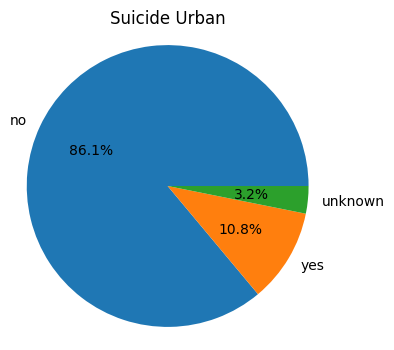

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def write_plt(column_name: str):
    counts = suicide[column_name].value_counts()
    plt.figure(figsize=(4, 4))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title("Suicide {}".format(column_name))
    plt.axis('equal') 
    plt.show()
write_plt('Urban')

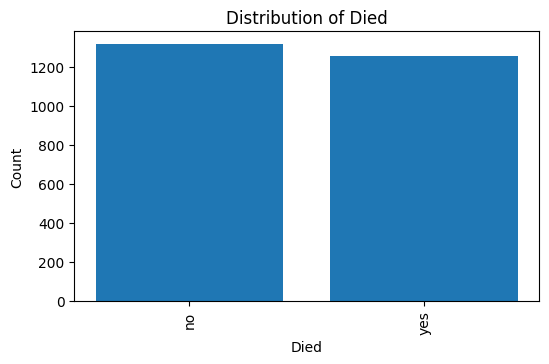

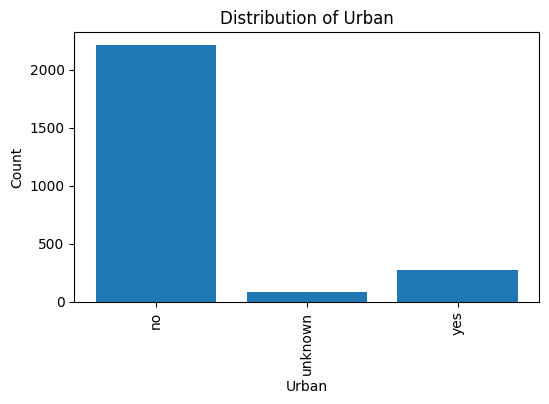

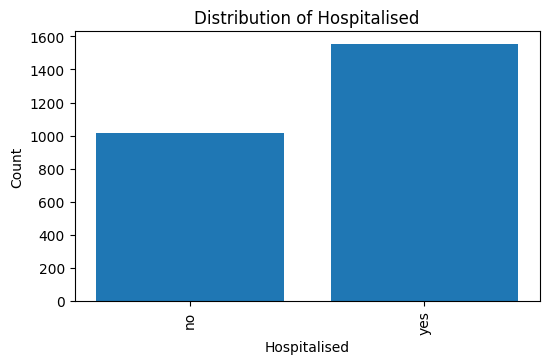

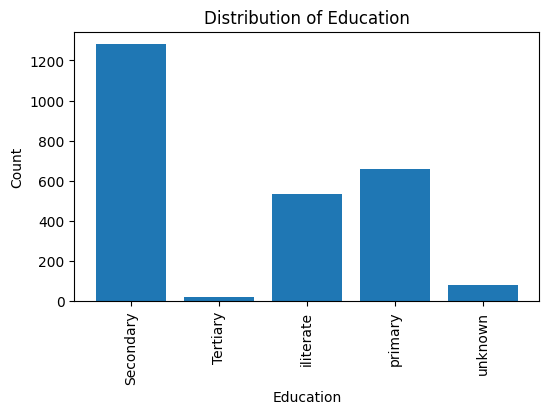

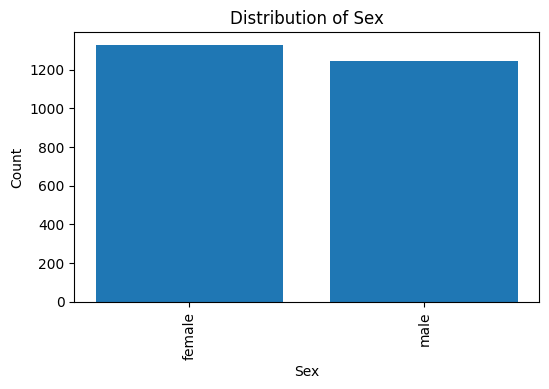

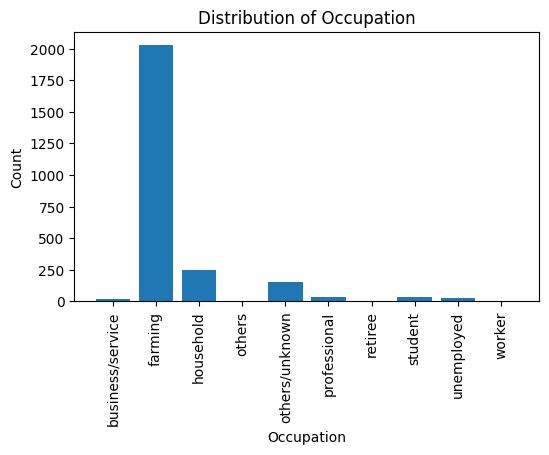

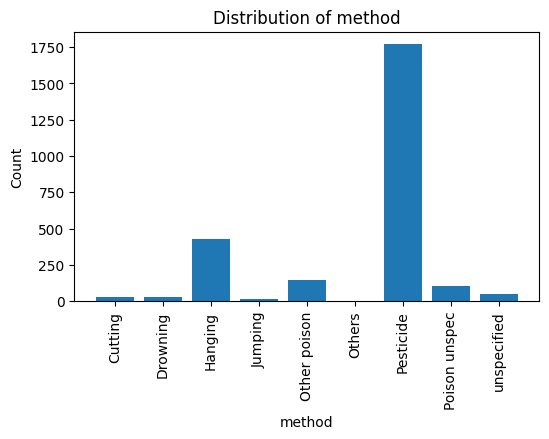

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
# 需要分开绘制的列名
columns = ['Died', 'Urban', 'Hospitalised', 'Education', 'Sex', 'Occupation', 'method']
# 遍历每个列，并绘制分布图
for column in columns:
    # 使用groupby()方法按照当前列进行分组，并计算每个组合的计数
    grouped = suicide.groupby(column).size().reset_index(name='Count')
    # 绘制分布图
    plt.figure(figsize=(6, 3.5))
    plt.bar(range(len(grouped)), grouped['Count'])
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Distribution of {}'.format(column))
    plt.xticks(range(len(grouped)), grouped[column], rotation=90)
    # 显示图形
    plt.show()

# 主要结论
- 几乎每两例自杀企图，就会造成一例死亡
- 绝大部分自杀者来自于农村的农民
- 自杀性别里男女比例差异不大
- 有 2/5 左右的自杀者没有被送医
- 主要的自杀方式是上吊和农药
- 绝大多数自杀者受教育程度很低


# 相关性检查

In [14]:
!pip install seaborn scikit-learn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl (294 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/40/c6/2e91eefb757822e70d351e02cc38d07c137212ae7c41ac12746415b4860a/scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl (9.4 MB)


<Axes: >

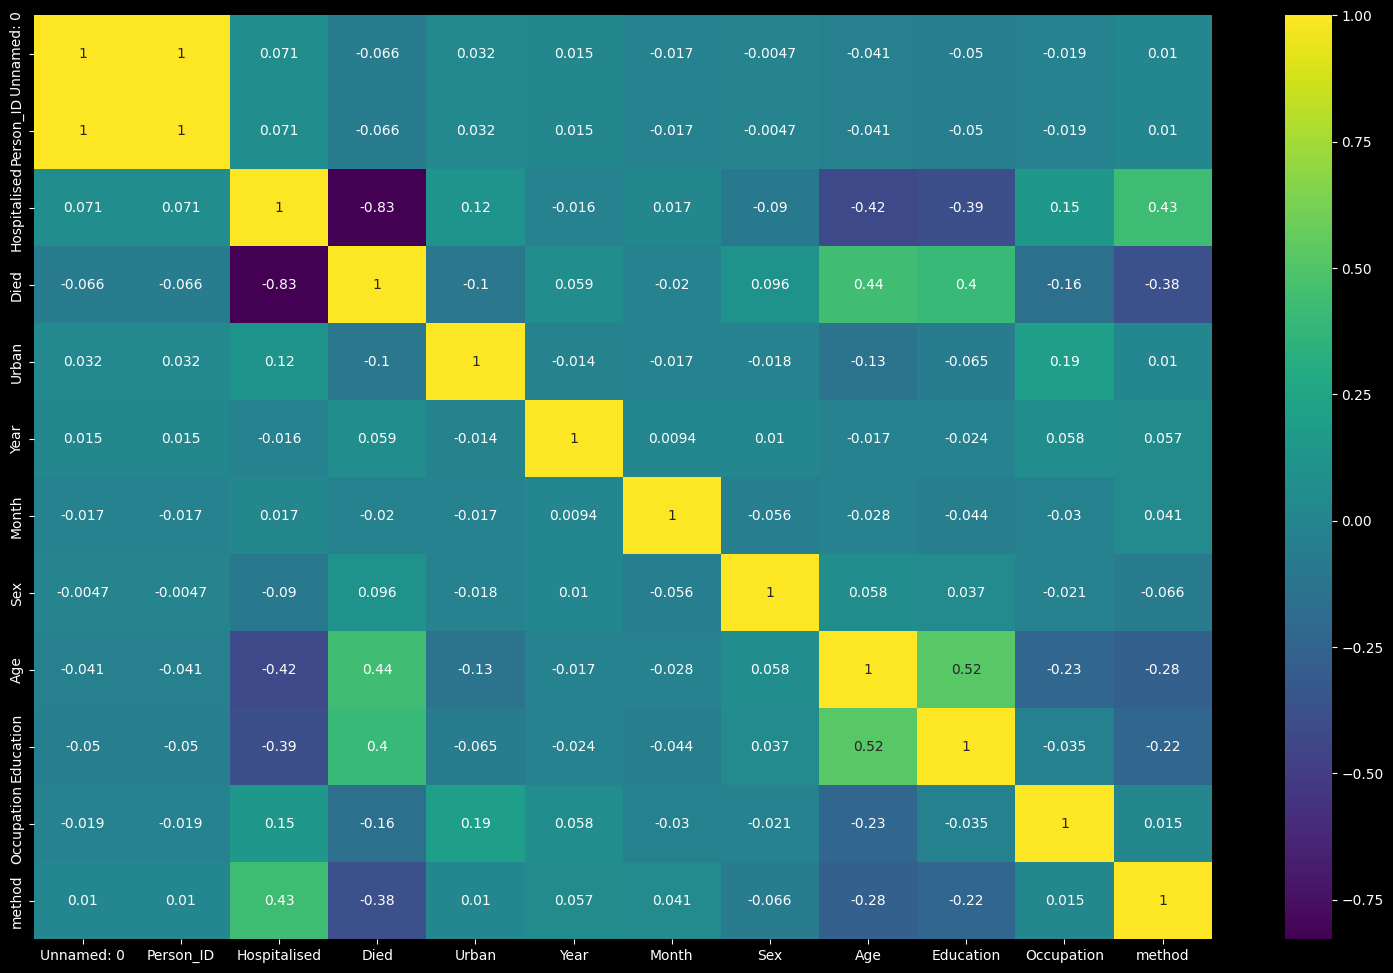

In [17]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

list_str = suicide.select_dtypes(include = 'object').columns
# LabelEncoder 是一种用于将分类变量转换为数值标签的工具，它属于 scikit-learn 库中的 preprocessing 模块。
# LabelEncoder 可以将分类变量的不同取值映射为整数标签，从而使其适用于机器学习算法。
le = LabelEncoder()
for c in list_str:
    suicide[c] = le.fit_transform(suicide[c])
plt.figure(figsize = (19, 12))
plt.style.use('dark_background')
# 绘制热力图（heatmap）。热力图是一种可视化工具，用于展示数据的矩阵形式，并使用颜色来表示不同数值的大小。
# 使用 sns.heatmap 可以将一个二维数据集以矩阵的形式呈现，并使用颜色来表示每个元素的数值大小。
# 热力图常用于显示相关性矩阵、混淆矩阵、特征矩阵等数据。
# corr() 是 Pandas 库中 DataFrame 对象的一个方法，用于计算列之间的相关性。
# 它返回一个相关性矩阵，其中每个元素表示对应列之间的相关性系数。
# 参见 https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
# 使用 corr() 可以计算 DataFrame 中列之间的相关性，并生成一个相关性矩阵。
# 相关性系数的取值范围在 -1 到 1 之间，表示两个变量之间的线性关系强度和方向。
sns.heatmap(suicide.corr(method='pearson'), annot = True, cmap = 'viridis')

# 相关性结论
- 死亡跟是否送医有极强的负相关性，跟受教育程度和年龄存在一定相关性，跟方式手段也有相关性
- 年龄和受教育程度也有特别强的相关性
- 方式手段跟是否送医也有很强相关性
- ……

# 知识
## 学会使用 pandas 做基础的数据分析
- 使用 head tail 函数读数据行
- 使用 describe 函数简化分析
- 使用 value_counts 算出每个值在列上出现的次数
- 使用 groupby size reindex 函数组合去做类似于 value_counts 的事情
## 学会使用 matplotlib 绘制基础图形
- 饼图
- 条形图

## 学会使用 sklearn 和 seaborn 去做简单的相关性分析

# 所有代码请在下面地址获取
- https://github.com/chengyumeng/how-to-learn-python

In [19]:
suicide.groupby('Year').size().reset_index(name='Count')

,Year,Count
0,2009,749
1,2010,956
2,2011,866
